 ## Random Forest
***Problem Statement:***
- A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
- Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all   other variable will be independent in the analysis.  


***About the data:***
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
+  Sales -- Unit sales (in thousands) at each location
+  Competitor Price -- Price charged by competitor at each location
+  Income -- Community income level (in thousands of dollars)
+  Advertising -- Local advertising budget for company at each location (in thousands of dollars)
+  Population -- Population size in region (in thousands)
+  Price -- Price company charges for car seats at each site
+  Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
+  Age -- Average age of the local population
+  Education -- Education level at each location
+  Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
+  US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 

In [1]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import pydotplus
from sklearn import preprocessing, datasets, tree, externals
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import export_graphviz
from io import StringIO

# Ignoring anoying warnigs
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df.shape

(400, 11)

In [4]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<AxesSubplot:>

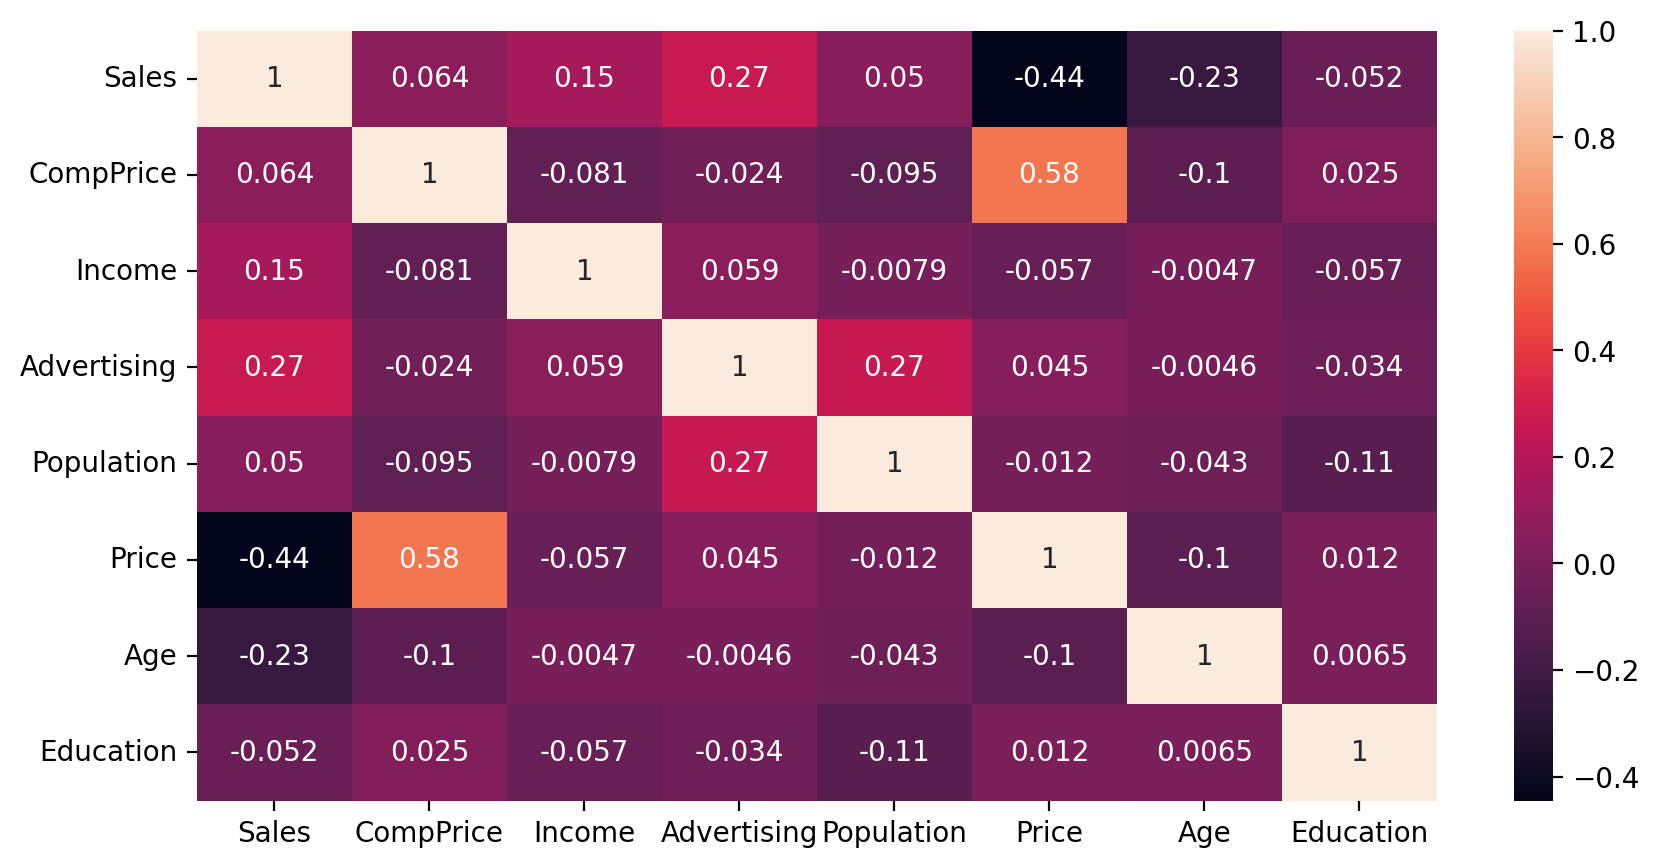

In [8]:
plt.figure(figsize=(10,5),dpi=200)
sns.heatmap(df.corr(),annot=True)

In [9]:
# converting catagorical column into numerical 
oe = OrdinalEncoder()

cat_cols = df.select_dtypes(object).columns
df[cat_cols] = oe.fit_transform(df[cat_cols])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0.0,42,17,1.0,1.0
1,11.22,111,48,16,260,83,1.0,65,10,1.0,1.0
2,10.06,113,35,10,269,80,2.0,59,12,1.0,1.0
3,7.40,117,100,4,466,97,2.0,55,14,1.0,1.0
4,4.15,141,64,3,340,128,0.0,38,13,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1.0,33,14,1.0,1.0
396,6.14,139,23,3,37,120,2.0,55,11,0.0,1.0
397,7.41,162,26,12,368,159,2.0,40,18,1.0,1.0
398,5.94,100,79,7,284,95,0.0,50,12,1.0,1.0


In [10]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.157470,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


In [11]:
# Checking average of "Sales" column because its target column
df['Sales'].mean()

7.496325

# Random Forest :
- The target column is continious, so we create a class of the value based on the mean
   - Less than (<=) 7.49 : "Small"
   - Greater than (>=) 7.49 : "large"

In [12]:
# Converting "Sales" column numerical to categorical
df["sales"]="small"
df.loc[df["Sales"]>7.49,"sales"]="large"
df.drop(["Sales"],axis=1,inplace=True)

In [13]:
# Unique values from "Sales" column
df['sales'].value_counts()

small    201
large    199
Name: sales, dtype: int64

In [14]:
# Creating independent & dependent variables
x = df.drop(columns=['sales'])
y = df['sales']

In [15]:
# Solitting dataset into train & test sets
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

print("Total rows & columns in train set :")
print("xtrain dataset : ", xtrain.shape)
print("ytrain dataset : ", ytrain.shape)

print("Total rows & columns in test set :")
print("xtest dataset : ", xtest.shape)
print("ytest dataset : ", ytest.shape)

Total rows & columns in train set :
xtrain dataset :  (320, 10)
ytrain dataset :  (320,)
Total rows & columns in test set :
xtest dataset :  (80, 10)
ytest dataset :  (80,)


In [16]:
ytrain.value_counts()

small    161
large    159
Name: sales, dtype: int64

**Model building**

In [17]:
model = RandomForestClassifier()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

print("Train Accuracy : ",model.score(xtrain,ytrain))
print("Test Accuracy : ",model.score(xtest,ytest))
print("Classification Report :")
print(classification_report(ytest,ypred))

Train Accuracy :  1.0
Test Accuracy :  0.8
Classification Report :
              precision    recall  f1-score   support

       large       0.82      0.78      0.79        40
       small       0.79      0.82      0.80        40

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80



In [18]:
# Training accuracy
pred_train = model.predict(xtrain)
print("Train Accuracy :",accuracy_score(ytrain,pred_train))
confusion_matrix(ytrain,pred_train)

Train Accuracy : 1.0


array([[159,   0],
       [  0, 161]], dtype=int64)

In [19]:
# Testing accuracy
pred_test = model.predict(xtest)
print("Test Accuracy :",accuracy_score(ytest,pred_test))
confusion_matrix(ytest,pred_test)

Test Accuracy : 0.8


array([[31,  9],
       [ 7, 33]], dtype=int64)

In [20]:
# Creating dataframe for actual & predicted values
df_t=pd.DataFrame({'Actual':ytest, 'Predicted':pred_test})
df_t


,Actual,Predicted
398,small,small
125,large,large
328,small,small
339,large,large
172,large,large
...,...,...
347,small,small
41,large,small
180,small,small
132,large,small


In [21]:
# Creating list of columns
cols = list(df.columns)
cols

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'sales']

In [22]:
predict = cols[0:10]
target = cols[10]

In [23]:
tree1 = model.estimators_[20]
tree1

DecisionTreeClassifier(max_features='auto', random_state=1536832733)

In [24]:
dot_data = StringIO()

export_graphviz(tree1, out_file=dot_data, feature_names=predict, class_names=target,
                filled=True, rounded=True, impurity=False, proportion=False, precision=2)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [25]:
graph.write_png('company_full.png')

True

In [26]:
rf_small = RandomForestClassifier(n_estimators=10,max_depth=3)
rf_small.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [27]:
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file=dot_data, feature_names=predict, rounded=True, precision=1)
graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [28]:
graph.write_png('company_small.png')

True

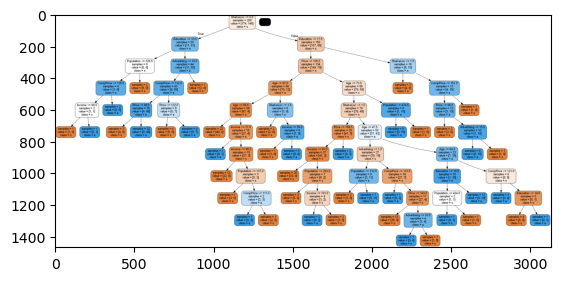

In [29]:
img = mpimg.imread('company_small.png') 
plt.imshow(img)

In [30]:
model.feature_importances_

array([0.1254407 , 0.09868617, 0.10442809, 0.09129504, 0.25124169,
       0.10950229, 0.13817726, 0.04891538, 0.01498934, 0.01732404])

In [31]:
feature_importance = pd.DataFrame({'feature': list(xtrain.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
feature_importance

,feature,importance
4,Price,0.251242
6,Age,0.138177
0,CompPrice,0.125441
5,ShelveLoc,0.109502
2,Advertising,0.104428
1,Income,0.098686
3,Population,0.091295
7,Education,0.048915
9,US,0.017324
8,Urban,0.014989


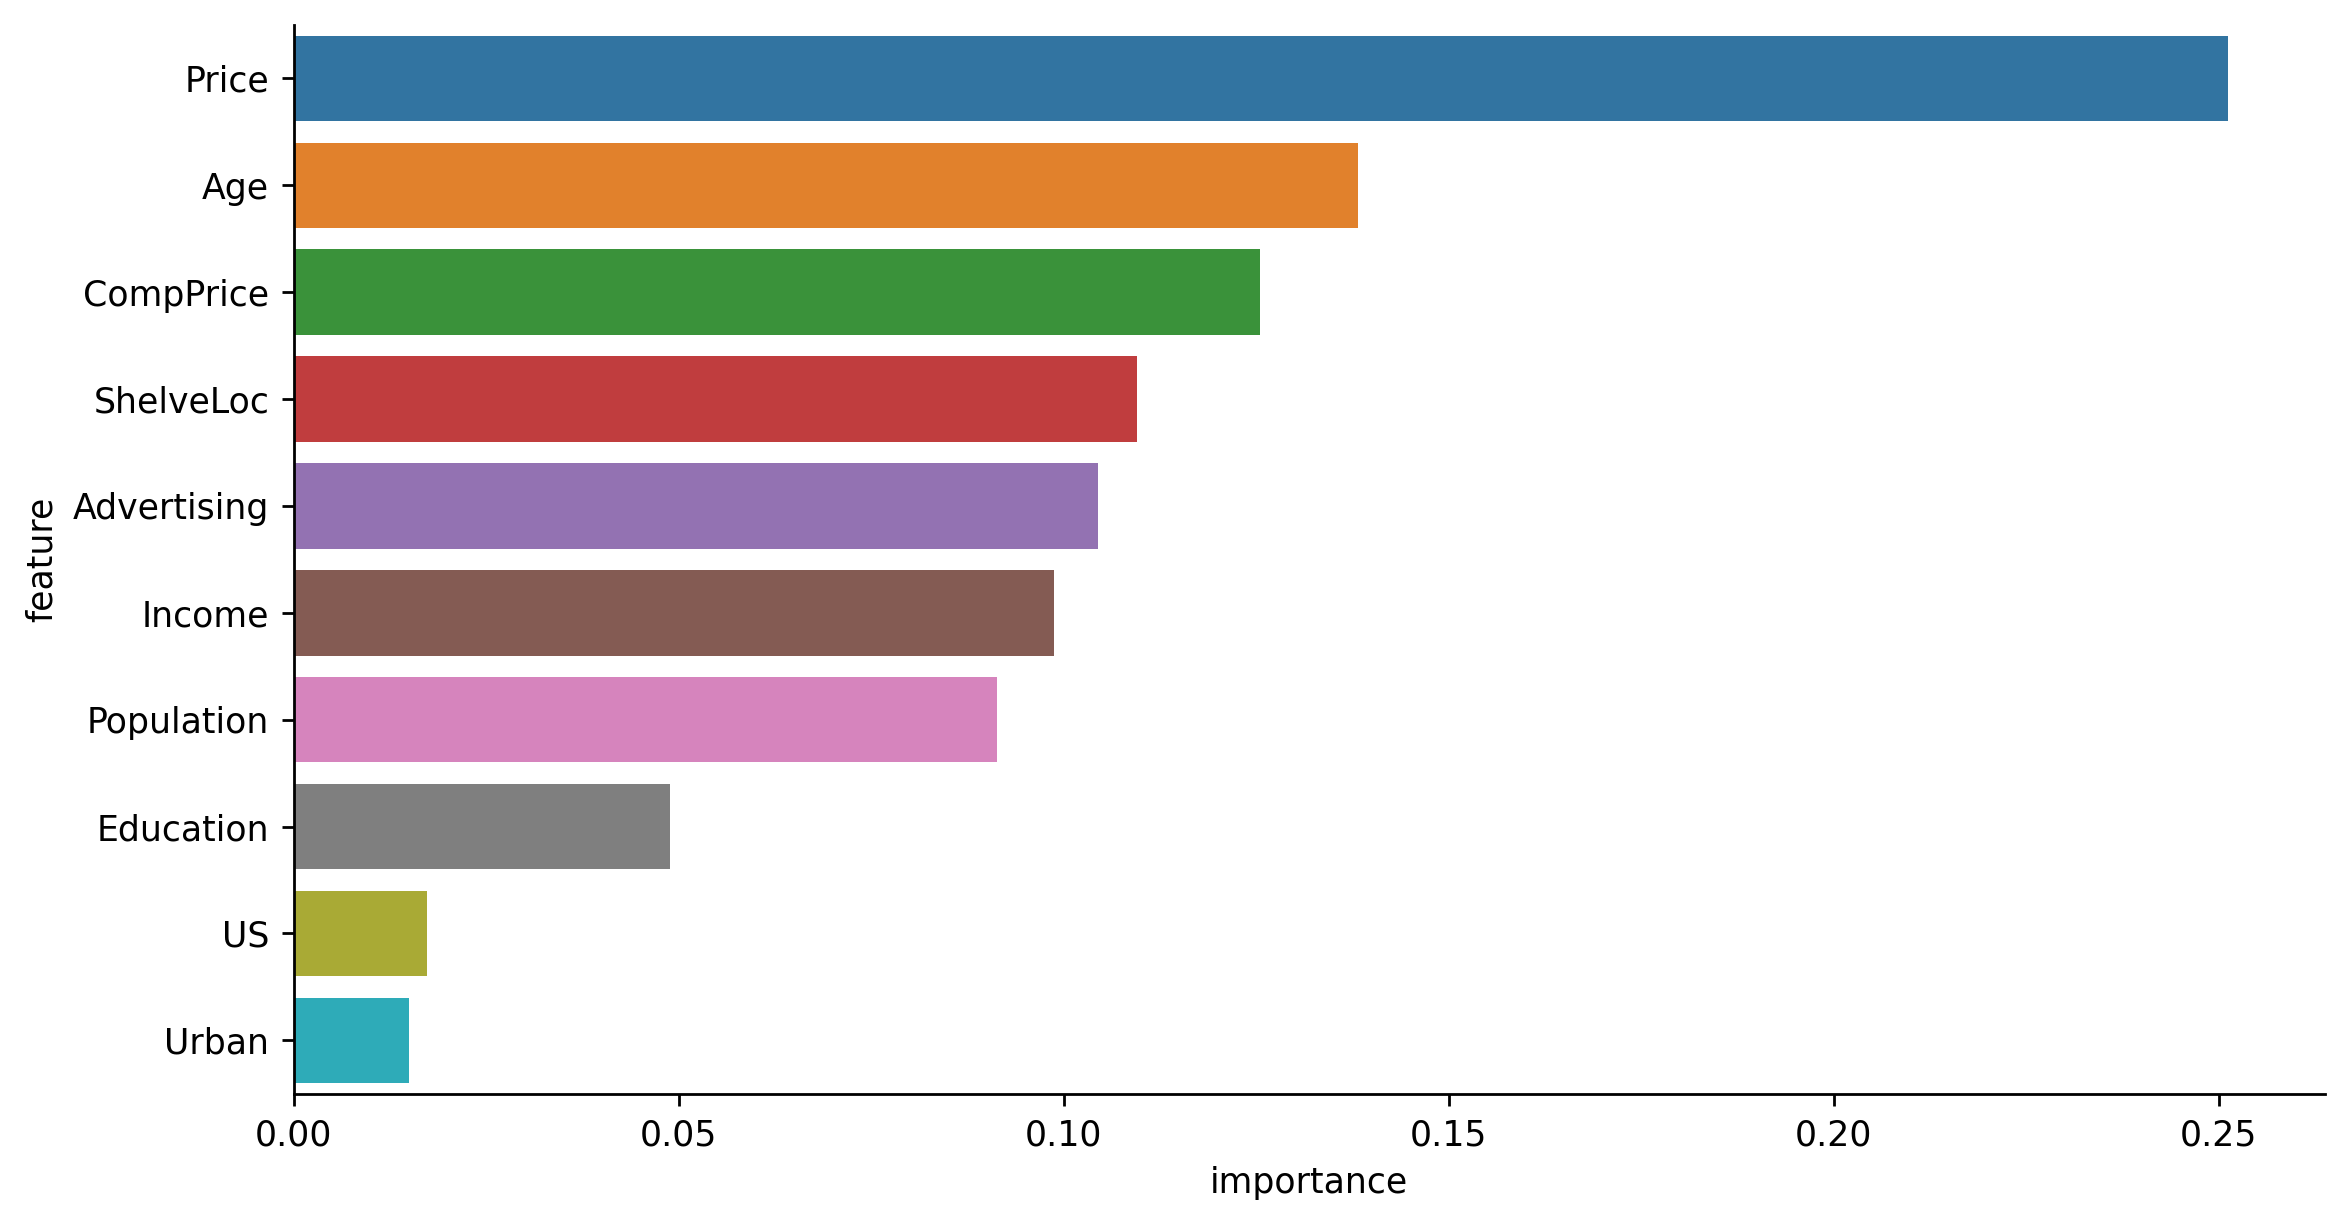

In [32]:
# Let's plot the ranking of the features
plt.rcParams['figure.dpi'] = 250
sns.catplot(data=feature_importance, x='importance', y='feature', aspect=1.9, kind="bar")
plt.tight_layout()

**As we seen in above data, the price column is most important feature**